## Cover Difference Plot
This plot shows the difference in gene coverage between optimal vs real and random vs real. It does this by fitting a function to the simulated random/optimal data, and using that fuction to compare the values of real coverage bs simulated coverage. The calc_random_diff() and calc_optimal_diff()

In [3]:
from numpy import loadtxt
import numpy as np
import glob
import os
import ast
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [8]:
def calc_random_diff(genome_filename, mature_filename, canon_site, v_subset):
    #load random simulation data into dictionary
    data_r = {}
    new_file_path = "Simulated Random Coverage/"+genome_filename+"_simulation/Canon Site "+canon_site
    for ID in glob.glob(os.path.join(new_file_path, '*.txt')):
           with open(os.path.join(os.getcwd(), ID), 'r') as f:
                data_r[int(os.path.basename(ID).split('/')[-1].strip(".tx"))] = (ast.literal_eval(f.read()))
                
    #sort dictionary
    keys_r = list(data_r.keys())
    keys_r.sort()
    data_r = {i: data_r[i] for i in keys_r}
    
    #generate means points (to plot line through boxplots)
    x = []
    y = []
    for i in data_r:
        x.append(i) 
        y.append(sum(data_r[i])/len(data_r[i]))
        
    #find the best fit using the generalized logistic function 
    #check https://en.wikipedia.org/wiki/Generalised_logistic_function for more info
    #In this variant of the generalized logistic, here are what the variables represent:
    #𝑎:the lower asymptote
    #𝑏:the Hill coefficient, i.e. the steepness of the slope in the linear portion of the sigmoid
    #𝑐:the 𝑥 value of the middle of the the linear portion of the curve
    #𝑑:the upper asymptote
    #𝑔:asymmetry factor - set to 0.5 initially
    def glf(x, a, b, c, d, g):
        return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
    popt, pcov = curve_fit(glf, x, y, p0=[0,1,np.quantile(x,.25),np.max(y),.4], maxfev=3000)
    
    plt.plot(x,y)
    plt.plot(x,glf(x,*popt))

    #load real coverage number and return result
    new_file_path = "Real Coverage/"+mature_filename+"/Canon Site "+canon_site
    if v_subset == 'Norm' or v_subset == 'Pre' or v_subset == 'Post':
        with open(new_file_path+"/"+v_subset+"_v.txt", 'r') as f:
            n = ast.literal_eval(f.read())
    else:
        print("ERROR: Invalid v_subset")
        return

    
    return glf(n[0],*popt)

/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_37326/1413733154.py:30: RuntimeWarning: invalid value encountered in power
  return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )


75058.4983325467

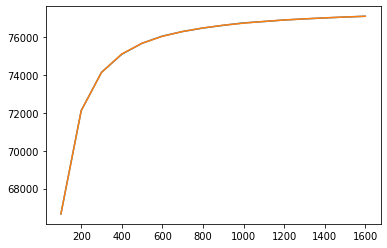

In [9]:
canon_site = 'B'
v_subset = 'Norm'
calc_random_diff('Human genes (GRCh38.p13)','Human (Homo sapiens)', canon_site, v_subset)

In [10]:
def calc_optimal_diff(genome_filename, mature_filename, canon_site, v_subset):
    #load random simulation data into dictionary
    data_r = {}
    new_file_path = "Simulated Optimal Coverage/"+genome_filename+"_simulation/Canon Site "+canon_site
    for ID in glob.glob(os.path.join(new_file_path, '*.txt')):
           with open(os.path.join(os.getcwd(), ID), 'r') as f:
                data_r[int(os.path.basename(ID).split('/')[-1].strip(".tx"))] = (ast.literal_eval(f.read()))
                
    #sort dictionary
    keys_r = list(data_r.keys())
    keys_r.sort()
    data_r = {i: data_r[i] for i in keys_r}
    
    #generate means points (to plot line through boxplots)
    x = []
    y = []
    for i in data_r:
        x.append(i) 
        y.append(sum(data_r[i])/len(data_r[i]))
        
    #find the best fit using logistic function (could be improved)
    def glf(x, a, b):
        return a*np.log(x)+b
    popt, pcov = curve_fit(glf, x, y)
    
    plt.plot(x,y)
    plt.plot(x,glf(x,*popt))

    #load real coverage number and return result
    new_file_path = "Real Coverage/"+mature_filename+"/Canon Site "+canon_site
    if v_subset == 'Norm' or v_subset == 'Pre' or v_subset == 'Post':
        with open(new_file_path+"/"+v_subset+"_v.txt", 'r') as f:
            n = ast.literal_eval(f.read())
    else:
        print("ERROR: Invalid v_subset")
        return
    
    return glf(n[0],*popt)

77479.27663752089

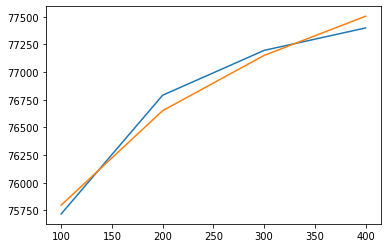

In [11]:
canon_site = 'B'
v_subset = 'Norm'
calc_optimal_diff('Human genes (GRCh38.p13)','Human (Homo sapiens)', canon_site, v_subset)

In [20]:
species_list = [
    ('Zebrafish genes (GRCz11)','Zebrafish (Danio rerio)'),
    ('Human genes (GRCh38.p13)','Human (Homo sapiens)')
]

In [75]:
def plot_difference(canon_site, v_subset):
    x = []
    y_rand = []
    y_opt = []
    
    #retrieving data
    for species in species_list:
        y_real = 0
        new_file_path = "Real Coverage/"+species[1]+"/Canon Site "+canon_site
        with open(new_file_path+"/Norm_v.txt", 'r') as f:
            data = ast.literal_eval(f.read())
            x.append(data[0])
            y_real = data[1]
        y_rand.append(y_real - calc_random_diff(species[0],species[1], canon_site, v_subset))
        y_opt.append(y_real - calc_optimal_diff(species[0],species[1], canon_site, v_subset))
    
    plt.figure(figsize=(10,10))
    plt.scatter(x, y_rand, label='Random Seed')
    plt.scatter(x, y_opt, label='Optimal Seed')
    plt.legend()
    plt.title("Cover Difference Plot (Canon Site"+canon_site+") "+v_subset)
    plt.savefig("Cover Difference Plot (Canon Site"+canon_site+") "+v_subset)
    plt.show()

/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_8117/715423118.py:30: RuntimeWarning: invalid value encountered in power
  return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )


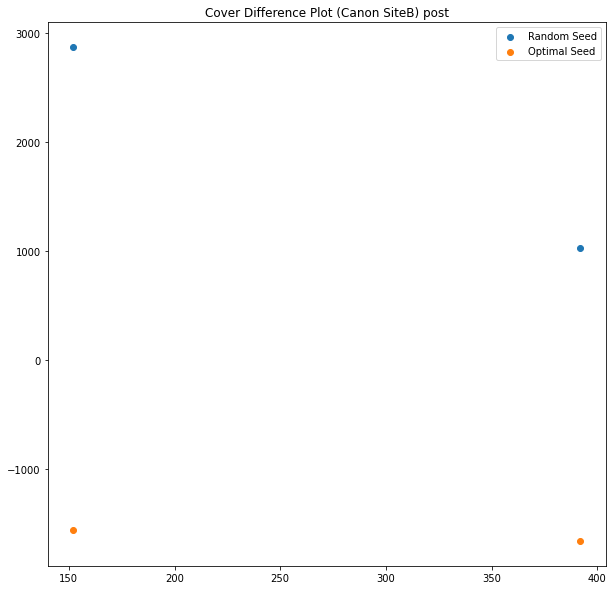

In [77]:
canon_site = 'B'
v_subset = 'post'
plot_difference(canon_site, v_subset)